In [2]:
import json
import os

with open('data/arc-agi_training_challenges.json') as f:
    challenges = json.load(f)

with open('data/arc-agi_training_solutions.json') as f:
    solutions = json.load(f)

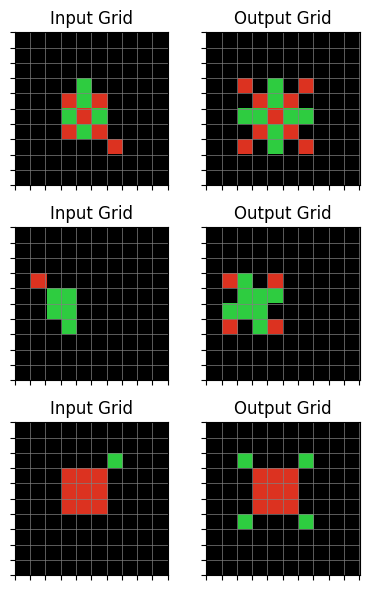

In [3]:
from matplotlib import pyplot as plt
import preprocessing
import numpy as np

# Function to visualize grid with color scheme
def visualize_grids_with_colors(grids: list[dict[str, list[list[int]]]]):
    n_grids = len(grids)
    fig, axes = plt.subplots(n_grids, 2, figsize=(4, n_grids * 2))
    
    if n_grids == 1:
        axes = [axes]
    
    for i, grid in enumerate(grids):
        input_grid = np.array(grid['input'])
        output_grid = np.array(grid['output'])
        
        # Replace input and output grids with color values
        reduced_input_grid = preprocessing.reduce_colors(input_grid)
        input_grid_colored = preprocessing.replace_with_colors(reduced_input_grid)
        reduced_output_grid = preprocessing.reduce_colors(output_grid)
        output_grid_colored = preprocessing.replace_with_colors(reduced_output_grid)
        
        # Plot input grid
        axes[i][0].imshow(input_grid_colored, interpolation='nearest')
        axes[i][0].set_title('Input Grid')
        axes[i][0].axis('on')
        axes[i][0].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][0].set_xticks(np.arange(-0.55, input_grid.shape[1], 1))
        axes[i][0].set_yticks(np.arange(-0.5, input_grid.shape[0], 1))
        axes[i][0].set_xticklabels([])
        axes[i][0].set_yticklabels([])
        
        # Plot output grid
        axes[i][1].imshow(output_grid_colored, interpolation='nearest')
        axes[i][1].set_title('Output Grid')
        axes[i][1].axis('on')
        axes[i][1].grid(True, which='both', color='gray', linestyle='-', linewidth=0.5)
        axes[i][1].set_xticks(np.arange(-0.55, output_grid.shape[1], 1))
        axes[i][1].set_yticks(np.arange(-0.5, output_grid.shape[0], 1))
        axes[i][1].set_xticklabels([])
        axes[i][1].set_yticklabels([])
    
    plt.tight_layout()
    plt.show()

# Example usage with colored grids
visualize_grids_with_colors(challenges["e40b9e2f"]['train'])

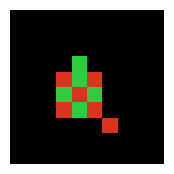

In [4]:
grid = np.array(challenges["e40b9e2f"]['train'][0]['input'])
grid = preprocessing.reduce_colors(grid)
colored_grid = preprocessing.replace_with_colors(grid)
# Visualize the grid
plt.figure(figsize=(2, 2))
plt.imshow(colored_grid)
plt.axis('off')
plt.show()

In [5]:
print(preprocessing.grid_to_ascii(grid))

 | | | | | | | | | 
 | | | | | | | | | 
 | | | | | | | | | 
 | | | |G| | | | | 
 | | |R|G|R| | | | 
 | | |G|R|G| | | | 
 | | |R|G|R| | | | 
 | | | | | |R| | | 
 | | | | | | | | | 
 | | | | | | | | | 



In [6]:
shapes = preprocessing.find_contiguous_shapes(grid)
for shape in shapes:
    print(preprocessing.grid_to_ascii(shape))

 |G| | 
R|G|R| 
G|R|G| 
R|G|R| 
 | | |R

